<a href="https://colab.research.google.com/github/Iingxaki/DS_Final_Project_RH/blob/main/DS450_MoreModels_RHw2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: connect to drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# prompt: import the standard libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# prompt: read /content/drive/MyDrive/Colab Notebooks/data for DS450.xlsx into df

import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data for DS450(2).xlsx')
print(df.head())

  Ticker      Beta EPS (2019) ROE (2019) ROA (2019) Gross Margin (2019)  \
0   AAPL  0.728095   3.655513   0.610645    0.16323            0.378178   
1   NVDA   2.88839   0.169089   0.443267   0.311541            0.612069   
2   MSFT  1.143125   5.277826   0.383465   0.136937             0.65902   
3   GOOG  0.888521   2.805572   0.170486   0.124472            0.555805   
4  GOOGL  0.888521   2.805572   0.170486   0.124472            0.555805   

  Operating Margin (2019) Net Profit Margin (2019) Cash Ratio (2019)  \
0                0.247342                 0.212381          0.462022   
1                0.325879                 0.353448          0.588412   
2                 0.34071                 0.311817          0.163584   
3                0.211001                 0.212181          0.409058   
4                0.211001                 0.212181          0.409058   

  Current Ratio (2019) Quick Ratio (2019) A-Turnover (2019) I-Turnover (2019)  \
0               1.5401           1.

# EDA

In [ ]:
# prompt: rename %change, Price to % price change

df = df.rename(columns={'% change, Price': '% price change'})
print(df.head())


  Ticker      Beta EPS (2019) ROE (2019) ROA (2019) Gross Margin (2019)  \
0   AAPL  0.728095   3.655513   0.610645    0.16323            0.378178   
1   NVDA   2.88839   0.169089   0.443267   0.311541            0.612069   
2   MSFT  1.143125   5.277826   0.383465   0.136937             0.65902   
3   GOOG  0.888521   2.805572   0.170486   0.124472            0.555805   
4  GOOGL  0.888521   2.805572   0.170486   0.124472            0.555805   

  Operating Margin (2019) Net Profit Margin (2019) Cash Ratio (2019)  \
0                0.247342                 0.212381          0.462022   
1                0.325879                 0.353448          0.588412   
2                 0.34071                 0.311817          0.163584   
3                0.211001                 0.212181          0.409058   
4                0.211001                 0.212181          0.409058   

  Current Ratio (2019) Quick Ratio (2019) A-Turnover (2019) I-Turnover (2019)  \
0               1.5401           1.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ticker                    1510 non-null   object 
 1   Beta                      1392 non-null   object 
 2   EPS (2019)                1326 non-null   object 
 3   ROE (2019)                1259 non-null   object 
 4   ROA (2019)                1317 non-null   object 
 5   Gross Margin (2019)       1127 non-null   object 
 6   Operating Margin (2019)   1378 non-null   object 
 7   Net Profit Margin (2019)  1378 non-null   object 
 8   Cash Ratio (2019)         1208 non-null   object 
 9   Current Ratio (2019)      1208 non-null   object 
 10  Quick Ratio (2019)        1208 non-null   object 
 11  A-Turnover (2019)         1314 non-null   object 
 12  I-Turnover (2019)         926 non-null    object 
 13  R-Turnover (2019)         1094 non-null   object 
 14  % price 

In [ ]:
# prompt: change every column except ticker to float64

import pandas as pd
for col in df.columns:
    if col != 'Ticker':
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ticker                    1510 non-null   object 
 1   Beta                      1381 non-null   float64
 2   EPS (2019)                1315 non-null   float64
 3   ROE (2019)                1248 non-null   float64
 4   ROA (2019)                1306 non-null   float64
 5   Gross Margin (2019)       1116 non-null   float64
 6   Operating Margin (2019)   1367 non-null   float64
 7   Net Profit Margin (2019)  1367 non-null   float64
 8   Cash Ratio (2019)         1197 non-null   float64
 9   Current Ratio (2019)      1197 non-null   float64
 10  Quick Ratio (2019)        1197 non-null   float64
 11  A-Turnover (2019)         1303 non-null   float64
 12  I-Turnover (2019)         915 non-null    float64
 13  R-Turnover (2019)         1083 non-null   float64
 14  % price 

In [ ]:
df.head(5)

,Ticker,Beta,EPS (2019),ROE (2019),ROA (2019),Gross Margin (2019),Operating Margin (2019),Net Profit Margin (2019),Cash Ratio (2019),Current Ratio (2019),Quick Ratio (2019),A-Turnover (2019),I-Turnover (2019),R-Turnover (2019),% price change
0,AAPL,0.728095,3.655513,0.610645,0.163230,0.378178,0.247342,0.212381,0.462022,1.5401,1.501286,0.738878,64.54329,11.2844,2.4113
1,NVDA,2.888390,0.169089,0.443267,0.311541,0.612069,0.325879,0.353448,0.588412,7.9436,6.656132,0.955122,9.88275,8.7140,21.8384
2,MSFT,1.143125,5.277826,0.383465,0.136937,0.659020,0.340710,0.311817,0.163584,2.5288,2.499121,0.461467,53.26688,4.4940,1.6728
3,GOOG,0.888521,2.805572,0.170486,0.124472,0.555805,0.211001,0.212181,0.409058,3.3741,3.351960,0.636354,153.71040,7.0123,1.8488
4,GOOGL,0.888521,2.805572,0.170486,0.124472,0.555805,0.211001,0.212181,0.409058,3.3741,3.351960,0.636354,153.71040,7.0123,1.8266


In [ ]:
# prompt: # prompt: corr matrix with everything except the ticker. change entries with words to 0. remove the numbers from the corr matrix# Replace non-numeric values with 0

import pandas as pd
# Replace non-numeric values with 0
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Calculate the correlation matrix, excluding the 'Ticker' column
corr_matrix = df.drop('Ticker', axis=1).corr()

# Display the correlation matrix
corr_matrix


,Beta,EPS (2019),ROE (2019),ROA (2019),Gross Margin (2019),Operating Margin (2019),Net Profit Margin (2019),Cash Ratio (2019),Current Ratio (2019),Quick Ratio (2019),A-Turnover (2019),I-Turnover (2019),R-Turnover (2019),% price change
Beta,1.000000,-0.006849,-0.053271,-0.027405,0.067786,-0.023019,-0.018962,0.068655,0.106055,0.091427,0.030827,-0.026706,-0.028804,0.158972
EPS (2019),-0.006849,1.000000,0.001402,0.001756,0.004378,-0.000348,-0.000088,0.006002,0.009824,0.008026,0.015137,0.004491,0.009400,0.004209
ROE (2019),-0.053271,0.001402,1.000000,0.631674,-0.024094,0.063627,0.061165,-0.110064,-0.082893,-0.091624,0.049710,0.013113,0.027473,-0.003837
ROA (2019),-0.027405,0.001756,0.631674,1.000000,0.017335,0.149074,0.142584,-0.252827,-0.202342,-0.229132,0.125318,0.022061,0.036401,-0.001891
Gross Margin (2019),0.067786,0.004378,-0.024094,0.017335,1.000000,0.110404,-0.039388,0.077920,0.134460,0.104950,0.084078,0.007668,0.045587,-0.009922
Operating Margin (2019),-0.023019,-0.000348,0.063627,0.149074,0.110404,1.000000,0.944696,-0.191991,-0.175866,-0.183701,0.046390,0.009786,0.015529,0.008127
Net Profit Margin (2019),-0.018962,-0.000088,0.061165,0.142584,-0.039388,0.944696,1.000000,-0.174830,-0.155688,-0.167954,0.038429,0.008091,0.012753,0.005168
Cash Ratio (2019),0.068655,0.006002,-0.110064,-0.252827,0.077920,-0.191991,-0.174830,1.000000,0.918435,0.955195,-0.104950,-0.020348,-0.035364,-0.009820
Current Ratio (2019),0.106055,0.009824,-0.082893,-0.202342,0.134460,-0.175866,-0.155688,0.918435,1.000000,0.972193,0.021221,-0.014020,-0.001232,0.003334
Quick Ratio (2019),0.091427,0.008026,-0.091624,-0.229132,0.104950,-0.183701,-0.167954,0.955195,0.972193,1.000000,-0.047416,-0.003346,-0.044686,0.000242


In [ ]:
df.head(5)

,Ticker,Beta,EPS (2019),ROE (2019),ROA (2019),Gross Margin (2019),Operating Margin (2019),Net Profit Margin (2019),Cash Ratio (2019),Current Ratio (2019),Quick Ratio (2019),A-Turnover (2019),I-Turnover (2019),R-Turnover (2019),% price change
0,0.0,0.728095,3.655513,0.610645,0.163230,0.378178,0.247342,0.212381,0.462022,1.5401,1.501286,0.738878,64.54329,11.2844,2.4113
1,0.0,2.888390,0.169089,0.443267,0.311541,0.612069,0.325879,0.353448,0.588412,7.9436,6.656132,0.955122,9.88275,8.7140,21.8384
2,0.0,1.143125,5.277826,0.383465,0.136937,0.659020,0.340710,0.311817,0.163584,2.5288,2.499121,0.461467,53.26688,4.4940,1.6728
3,0.0,0.888521,2.805572,0.170486,0.124472,0.555805,0.211001,0.212181,0.409058,3.3741,3.351960,0.636354,153.71040,7.0123,1.8488
4,0.0,0.888521,2.805572,0.170486,0.124472,0.555805,0.211001,0.212181,0.409058,3.3741,3.351960,0.636354,153.71040,7.0123,1.8266


                              Beta  EPS (2019)  ROE (2019)  ROA (2019)  \
Beta                      1.000000   -0.006849   -0.053271   -0.027405   
EPS (2019)               -0.006849    1.000000    0.001402    0.001756   
ROE (2019)               -0.053271    0.001402    1.000000    0.631674   
ROA (2019)               -0.027405    0.001756    0.631674    1.000000   
Gross Margin (2019)       0.067786    0.004378   -0.024094    0.017335   
Operating Margin (2019)  -0.023019   -0.000348    0.063627    0.149074   
Net Profit Margin (2019) -0.018962   -0.000088    0.061165    0.142584   
Cash Ratio (2019)         0.068655    0.006002   -0.110064   -0.252827   
Current Ratio (2019)      0.106055    0.009824   -0.082893   -0.202342   
Quick Ratio (2019)        0.091427    0.008026   -0.091624   -0.229132   
A-Turnover (2019)         0.030827    0.015137    0.049710    0.125318   
I-Turnover (2019)        -0.026706    0.004491    0.013113    0.022061   
R-Turnover (2019)        -0.028804    

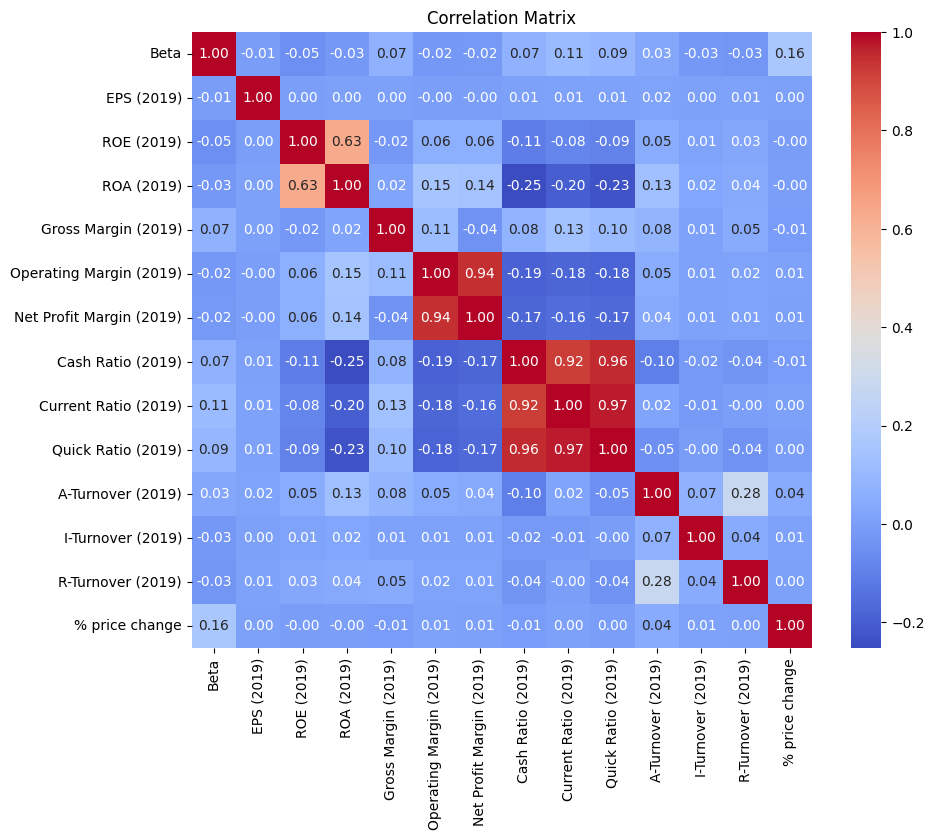

In [ ]:
# prompt: corr matrix with everything except the ticker. change entries with words to 0. remove the numbers from the corr matrix# Replace non-numeric values with 0
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = 0

# Calculate the correlation matrix, excluding the 'Ticker' column
corr_matrix = df.drop(columns=['Ticker']).corr()

# Print the correlation matrix without the numbers
print(corr_matrix)
# Optional: visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.columns

Index(['Ticker', 'Beta', 'EPS (2019)', 'ROE (2019)', 'ROA (2019)',
       'Gross Margin (2019)', 'Operating Margin (2019)',
       'Net Profit Margin (2019)', 'Cash Ratio (2019)', 'Current Ratio (2019)',
       'Quick Ratio (2019)', 'A-Turnover (2019)', 'I-Turnover (2019)',
       'R-Turnover (2019)', '% price change'],
      dtype='object')

In [ ]:
df.describe()

,Ticker,Beta,EPS (2019),ROE (2019),ROA (2019),Gross Margin (2019),Operating Margin (2019),Net Profit Margin (2019),Cash Ratio (2019),Current Ratio (2019),Quick Ratio (2019),A-Turnover (2019),I-Turnover (2019),R-Turnover (2019),% price change
count,1510.0,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000
mean,0.0,0.890114,-20.039169,0.648470,-0.368430,17.156861,-301.150120,-242.749454,0.959473,1.822718,1.385643,0.592353,12.170118,11.715496,0.722186
std,0.0,0.537846,2694.162754,38.739293,12.988601,29.400042,5950.284144,5762.550214,2.695415,2.869731,2.701786,0.635662,62.454513,36.756121,4.828510
min,0.0,-0.861710,-88058.600000,-890.917000,-168.068000,-497.119000,-179011.000000,-173789.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.999850
25%,0.0,0.583938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018725,0.318550,0.096062,0.082550,0.000000,0.000000,0.000000
50%,0.0,0.915205,0.485000,0.176702,0.081576,0.585209,0.217330,0.164720,0.228334,1.252850,0.815650,0.449745,0.000000,5.605500,0.125474
75%,0.0,1.169237,2.317313,8.860775,2.675875,33.051450,10.287825,6.827400,0.741650,2.180750,1.449940,0.827225,7.187038,9.108175,0.770260
max,0.0,4.982928,56539.580000,298.256500,97.006400,99.797600,291.247300,31667.920000,40.672600,41.832800,40.672600,4.794500,1828.012000,816.875100,175.851900


In [ ]:
# prompt: drop first row, then put ticker, beta, and % price change column into df named fixed

fixed = df.iloc[1:, [0, 2, 5]]
fixed.columns = ['Ticker','beta', '% price change']
print(fixed.head())


   Ticker      beta  % price change
1     0.0  0.169089        0.612069
2     0.0  5.277826        0.659020
3     0.0  2.805572        0.555805
4     0.0  2.805572        0.555805
5     0.0  1.102045        0.409900


In [ ]:
# prompt: group the columns with (2019) in it to df 2019, do the same with (2020), (2021), (2022), (2023)
df_2019 = df.filter(like='(2019)')
print("2019 columns:")
print(df_2019.head())

2019 columns:
   EPS (2019)  ROE (2019)  ROA (2019)  Gross Margin (2019)  \
0    3.655513    0.610645    0.163230             0.378178   
1    0.169089    0.443267    0.311541             0.612069   
2    5.277826    0.383465    0.136937             0.659020   
3    2.805572    0.170486    0.124472             0.555805   
4    2.805572    0.170486    0.124472             0.555805   

   Operating Margin (2019)  Net Profit Margin (2019)  Cash Ratio (2019)  \
0                 0.247342                  0.212381           0.462022   
1                 0.325879                  0.353448           0.588412   
2                 0.340710                  0.311817           0.163584   
3                 0.211001                  0.212181           0.409058   
4                 0.211001                  0.212181           0.409058   

   Current Ratio (2019)  Quick Ratio (2019)  A-Turnover (2019)  \
0                1.5401            1.501286           0.738878   
1                7.9436       

In [ ]:
df_2019 = pd.concat([fixed, df_2019], axis=1)
print("\n2019 with fixed:")
print(df_2019.head())


2019 with fixed:
   Ticker      beta  % price change  EPS (2019)  ROE (2019)  ROA (2019)  \
1     0.0  0.169089        0.612069    0.169089    0.443267    0.311541   
2     0.0  5.277826        0.659020    5.277826    0.383465    0.136937   
3     0.0  2.805572        0.555805    2.805572    0.170486    0.124472   
4     0.0  2.805572        0.555805    2.805572    0.170486    0.124472   
5     0.0  1.102045        0.409900    1.102045    0.186723    0.051446   

   Gross Margin (2019)  Operating Margin (2019)  Net Profit Margin (2019)  \
1             0.612069                 0.325879                  0.353448   
2             0.659020                 0.340710                  0.311817   
3             0.555805                 0.211001                  0.212181   
4             0.555805                 0.211001                  0.212181   
5             0.409900                 0.051807                  0.041309   

   Cash Ratio (2019)  Current Ratio (2019)  Quick Ratio (2019)  \
1 

In [ ]:
# prompt: # prompt: corr of df_2019 drop Ticker. just print the corr of each column to % price change. if abs(corr coefficient) >.25 mark *, if >.5 mark **, if >.75 mark ***.

# Calculate the correlation of each column with '% price change'
correlations = df_2019.drop('Ticker', axis=1).corr()['% price change']

# Print the correlations with significance markers
for col, corr in correlations.items():
  if abs(corr) > 0.75:
    print(f"{col}: {corr:.2f} ***")
  elif abs(corr) > 0.5:
    print(f"{col}: {corr:.2f} **")
  elif abs(corr) > 0.25:
    print(f"{col}: {corr:.2f} *")
  else:
    print(f"{col}: {corr:.2f}")


beta: 0.00
% price change: 1.00 ***
EPS (2019): 0.00
ROE (2019): -0.02
ROA (2019): 0.02
Gross Margin (2019): 1.00 ***
Operating Margin (2019): 0.11
Net Profit Margin (2019): -0.04
Cash Ratio (2019): 0.08
Current Ratio (2019): 0.13
Quick Ratio (2019): 0.10
A-Turnover (2019): 0.08
I-Turnover (2019): 0.01
R-Turnover (2019): 0.05


# MLR


In [ ]:
# prompt: drop Ticker column run mlr using % price change on the response variable and the rest of the columns as the explanatory variable

import statsmodels.api as sm

# Define the dependent variable (response variable)
y = df_2019['% price change']

# Define the independent variables (explanatory variables) -  exclude 'Ticker' and '% price change'
X = df_2019.drop(columns=['Ticker', '% price change'])

# Replace infinite values with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Drop rows with any NaN values
X = X.dropna()

# Ensure y has the same number of rows as X
y = y[X.index]  # Align y with X after dropping rows

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         % price change   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.529e+29
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:37:20   Log-Likelihood:                 40198.
No. Observations:                1509   AIC:                        -8.037e+04
Df Residuals:                    1496   BIC:                        -8.030e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The results indicate a highly accurate regression model with an R-squared value of 1.000, suggesting the predictors perfectly explain the variation in % price change. However, strong multicollinearity issues are highlighted by the small eigenvalue and extreme t-statistics, potentially compromising the reliability of individual coefficients. Some variables, like Gross Margin (2019), are highly significant, while others, such as Cash Ratio and Current Ratio, show minimal impact. The adjusted R-squared and F-statistic reinforce the model's fit, but caution is advised due to potential overfitting and unstable parameter estimates.

# Ridge

In [ ]:
# prompt: drop Ticker column run Ridge using % price change on the response variable and the rest of the columns as the explanatory variable. give adjusted R-squared. R-squared

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming df_2019 is already defined as in your previous code

# Define the dependent variable (response variable)
y = df_2019['% price change']

# Define the independent variables (explanatory variables) - exclude 'Ticker' and '% price change'
X = df_2019.drop(columns=['Ticker', '% price change'])

# Replace infinite values with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Drop rows with any NaN values
X = X.dropna()

# Ensure y has the same number of rows as X
y = y[X.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Calculate R-squared and adjusted R-squared
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")


R-squared: 0.9999999999982118
Adjusted R-squared: 0.999999999998131


Ridge Regression is promising, but might indicate overfitting.

# Lasso

In [ ]:
# prompt: run lasso regression with % price change as the response variable. print results with adjusted r-squared

from sklearn.linear_model import Lasso

# Assuming df_2019, X, and y are already defined as in your previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha value
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Calculate R-squared and adjusted R-squared
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = sum(lasso_model.coef_ != 0)  # Number of non-zero coefficients
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")
print("Coefficients:", lasso_model.coef_)


R-squared: 0.9999978757752633
Adjusted R-squared: 0.9999978543904505
Coefficients: [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  9.98543912e-01  9.41548629e-06 -9.47564247e-06  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00]


# Elastic Net

In [ ]:
# prompt: run elastic net regression with % price change as the response variable. print results with adjusted r-squared

from sklearn.linear_model import ElasticNet

# Assuming df_2019, X, and y are already defined as in your previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Elastic Net regression model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5) #alpha and l1_ratio can be tuned
elastic_net_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elastic_net_model.predict(X_test)

# Calculate R-squared and adjusted R-squared
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = sum(elastic_net_model.coef_ != 0)  # Number of non-zero coefficients
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")
print("Coefficients:", elastic_net_model.coef_)


R-squared: 0.9999978498093579
Adjusted R-squared: 0.9999978134885701
Coefficients: [ 1.75399911e-08  2.56867891e-12 -0.00000000e+00 -0.00000000e+00
  9.98534982e-01  9.68306452e-06 -9.75075813e-06  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00]


# SVR

In [ ]:
# prompt: run SVR with % price change as the response variable. print results with adjusted r-squared

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming df_2019, X, and y are already defined as in your previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))


# Initialize and train the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1) # You can tune hyperparameters
svr_model.fit(X_train_scaled, y_train_scaled.ravel())

# Make predictions on the test set
y_pred_scaled = svr_model.predict(X_test_scaled)

# Inverse transform the predictions to get original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")


Mean Squared Error: 60.550105873285894
R-squared: 0.9170941543200346
Adjusted R-squared: 0.9133518765636472


# Random Forest

In [ ]:
# prompt: run random forest regression with % price change as the response variable. print results with adjusted r-squared

from sklearn.ensemble import RandomForestRegressor

# Assuming df_2019, X, and y are already defined as in your previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can tune hyperparameters
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")


R-squared: 0.9984007284397166
Adjusted R-squared: 0.9983285390984539


# Decision Tree

In [ ]:
# prompt: run decision tree with % price change as the response variable. print results with adjusted r-squared

from sklearn.tree import DecisionTreeRegressor

# Assuming df_2019, X, and y are already defined as in your previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)  # You can tune hyperparameters
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")


R-squared: 0.9995853303375964
Adjusted R-squared: 0.9995666126097796


# KNN

In [ ]:
# prompt: run KNN with % price change as the response variable. print results with adjusted r-squared

from sklearn.neighbors import KNeighborsRegressor

# Assuming df_2019, X, and y are already defined as in your previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune hyperparameters like n_neighbors
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")


R-squared: 0.8852158768272236
Adjusted R-squared: 0.8800346490451191


# WLS

In [ ]:
# prompt: run WLS with % price change as the response variable. print results with adjusted r-squared

import numpy as np
# Define the dependent variable (response variable)
y = df_2019['% price change']

# Define the independent variables (explanatory variables) - exclude 'Ticker' and '% price change'
X = df_2019.drop(columns=['Ticker', '% price change'])

# Replace infinite values with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Drop rows with any NaN values
X = X.dropna()

# Ensure y has the same number of rows as X
y = y[X.index]

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)

# Fit the WLS model
# You can specify weights if you have them. Here, we use a simple weight of 1 for all observations
weights = np.ones(len(y))
wls_model = sm.WLS(y, X, weights=weights).fit()

# Print the model summary
print(wls_model.summary())


                            WLS Regression Results                            
Dep. Variable:         % price change   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.529e+29
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:37:22   Log-Likelihood:                 40198.
No. Observations:                1509   AIC:                        -8.037e+04
Df Residuals:                    1496   BIC:                        -8.030e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# Logit

In [ ]:
# prompt: make a new column "+/- price change" where it is 1 if "% price change" is >0 and 0 if "% price change" is < or = 0.

import numpy as np
df_2019['+/- price change'] = np.where(df_2019['% price change'] > 0, 1, 0)
print(df_2019.head())

   Ticker      beta  % price change  EPS (2019)  ROE (2019)  ROA (2019)  \
1     0.0  0.169089        0.612069    0.169089    0.443267    0.311541   
2     0.0  5.277826        0.659020    5.277826    0.383465    0.136937   
3     0.0  2.805572        0.555805    2.805572    0.170486    0.124472   
4     0.0  2.805572        0.555805    2.805572    0.170486    0.124472   
5     0.0  1.102045        0.409900    1.102045    0.186723    0.051446   

   Gross Margin (2019)  Operating Margin (2019)  Net Profit Margin (2019)  \
1             0.612069                 0.325879                  0.353448   
2             0.659020                 0.340710                  0.311817   
3             0.555805                 0.211001                  0.212181   
4             0.555805                 0.211001                  0.212181   
5             0.409900                 0.051807                  0.041309   

   Cash Ratio (2019)  Current Ratio (2019)  Quick Ratio (2019)  \
1           0.588412

In [ ]:
# prompt: drop % price change
df1_2019 = df_2019.drop(columns=['% price change'])

In [ ]:
# # prompt: drop ticker and run logistic regression with "+/- price change" as the response variable and the rest of the variables as the explanatory variable

# import numpy as np
# # Define the dependent variable (response variable)
# y = df1_2019['+/- price change']

# # Define the independent variables (explanatory variables) - exclude 'Ticker' and '+/- price change'
# X = df1_2019.drop(columns=['Ticker', '+/- price change'])

# # Replace infinite values with NaN
# X = X.replace([np.inf, -np.inf], np.nan)

# # Drop rows with any NaN values
# X = X.dropna()

# # Ensure y has the same number of rows as X
# y = y[X.index]

# # Add a constant to the independent variables (intercept term)
# X = sm.add_constant(X)

# # Fit the logistic regression model
# logit_model = sm.Logit(y, X).fit()

# # Print the model summary
# print(logit_model.summary())


         Current function value: inf
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

In [ ]:
# # Calculate the correlation matrix
# correlation_matrix = X.corr()

# # Set a threshold for high correlation (e.g., 0.9)
# threshold = 0.9

# # Find highly correlated features
# # highly_correlated_features = set()
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > threshold:
#             colname = correlation_matrix.columns[i]
#             highly_correlated_features.add(colname)

# # Remove highly correlated features from X
# X = X.drop(columns=highly_correlated_features)

# # Apply regularization (L2 regularization in this case)
# #logit_model = sm.Logit(y, X).fit_regularized(method='l1', alpha=0.1)  # Adjust alpha as needed

# # Remove the constant term
# X = X.drop('const', axis=1)  # Remove const column

# # Re-fit the model
# logit_model = sm.Logit(y, X).fit()
# print(logit_model.summary())

         Current function value: inf
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

logit don't work because of singular matrix.

# BLuE?

In [ ]:
print(df_2019.head())

   Ticker      beta  % price change  EPS (2019)  ROE (2019)  ROA (2019)  \
1     0.0  0.169089        0.612069    0.169089    0.443267    0.311541   
2     0.0  5.277826        0.659020    5.277826    0.383465    0.136937   
3     0.0  2.805572        0.555805    2.805572    0.170486    0.124472   
4     0.0  2.805572        0.555805    2.805572    0.170486    0.124472   
5     0.0  1.102045        0.409900    1.102045    0.186723    0.051446   

   Gross Margin (2019)  Operating Margin (2019)  Net Profit Margin (2019)  \
1             0.612069                 0.325879                  0.353448   
2             0.659020                 0.340710                  0.311817   
3             0.555805                 0.211001                  0.212181   
4             0.555805                 0.211001                  0.212181   
5             0.409900                 0.051807                  0.041309   

   Cash Ratio (2019)  Current Ratio (2019)  Quick Ratio (2019)  \
1           0.588412

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

def check_multicollinearity(df, year):
    # Prepare data
    X = df.filter(like=f'({year})').copy()
    # Add a constant term for the intercept
    X = sm.add_constant(X)
    # Drop rows with infinite or NaN values
    X = X.replace([np.inf, -np.inf], np.nan).dropna()

    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    print(f"VIF for {year}:\n{vif_data}\n")


def check_heteroscedasticity(df, year):
    # Prepare data
    X = df.filter(like=f'({year})').copy()
    y = df['% price change'].copy()

    # Drop rows with NaN or infinite values in X or y
    df_cleaned = pd.concat([X, y], axis=1).replace([np.inf, -np.inf], np.nan).dropna()
    X = df_cleaned.filter(like=f'({year})').copy()
    y = df_cleaned['% price change'].copy()

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Breusch-Pagan test for heteroscedasticity
    _, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)

    print(f"Breusch-Pagan test for {year}:")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("Heteroscedasticity is likely present.\n")
    else:
        print("Heteroscedasticity is not likely present.\n")


def check_autocorrelation(df, year):
    # Prepare data
    X = df.filter(like=f'({year})').copy()
    y = df['% price change'].copy()

    # Drop rows with NaN or infinite values in X or y
    df_cleaned = pd.concat([X, y], axis=1).replace([np.inf, -np.inf], np.nan).dropna()
    X = df_cleaned.filter(like=f'({year})').copy()
    y = df_cleaned['% price change'].copy()

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Durbin-Watson test for autocorrelation
    dw_stat = sm.stats.stattools.durbin_watson(model.resid)
    print(f"Durbin-Watson statistic for {year}: {dw_stat}\n")
    if dw_stat < 1.5 or dw_stat > 2.5:
      print("Autocorrelation may be present.")
    else:
      print("Autocorrelation is not likely present.")

check_multicollinearity(df_2019, 2019)
check_heteroscedasticity(df_2019, 2019)
check_autocorrelation(df_2019, 2019)

VIF for 2019:
                     feature        VIF
0                      const   2.582356
1                 EPS (2019)   1.000377
2                 ROE (2019)   1.682997
3                 ROA (2019)   1.809857
4        Gross Margin (2019)   1.341092
5    Operating Margin (2019)  12.141703
6   Net Profit Margin (2019)  11.878476
7          Cash Ratio (2019)  12.305856
8       Current Ratio (2019)  21.219963
9         Quick Ratio (2019)  35.185951
10         A-Turnover (2019)   1.217786
11         I-Turnover (2019)   1.014746
12         R-Turnover (2019)   1.112433

Breusch-Pagan test for 2019:
P-value: 1.5103555343915356e-307
Heteroscedasticity is likely present.

Durbin-Watson statistic for 2019: 1.9290939326916494

Autocorrelation is not likely present.


Summary:
📉 Heteroscedasticity is a clear issue → use robust standard errors.

📦 Multicollinearity is a big red flag → reduce redundant variables or regularize.

📈 No autocorrelation → residuals behave independently, which is good.

In [ ]:
df_2019.columns

Index(['Ticker', 'beta', '% price change', 'EPS (2019)', 'ROE (2019)',
       'ROA (2019)', 'Gross Margin (2019)', 'Operating Margin (2019)',
       'Net Profit Margin (2019)', 'Cash Ratio (2019)', 'Current Ratio (2019)',
       'Quick Ratio (2019)', 'A-Turnover (2019)', 'I-Turnover (2019)',
       'R-Turnover (2019)', '+/- price change'],
      dtype='object')

In [ ]:
# prompt: for df_2019 (not logit), run ramsey reset test

import pandas as pd
import statsmodels.api as sm  # Make sure statsmodels.api is imported
from statsmodels.stats.diagnostic import linear_reset # Import reset_ramsey directly

def run_ramsey_reset(df, year):
    # Prepare data for regression
    X = df.filter(like=f'({year})').copy()
    y = df['% price change'].copy()

    # Drop rows with NaN in either X or y
    df_cleaned = pd.concat([X, y], axis=1).dropna()
    X = df_cleaned.filter(like=f'({year})').copy()
    y = df_cleaned['% price change'].copy()

    # Add a constant to the model (intercept)
    X = sm.add_constant(X)

    # Fit the OLS model
    model = sm.OLS(y, X)
    results = model.fit()

    # Perform the Ramsey RESET test
    reset_test = linear_reset(results, power=2, use_f=True) # degree specifies the polynomial degree # Call reset_ramsey directly
    print(f"Ramsey RESET test results for {year}:\n")
    print(reset_test)


# Run the Ramsey RESET test for df_2019
run_ramsey_reset(df_2019, 2019)

Ramsey RESET test results for 2019:

<F test: F=54.51932088601545, p=2.5455794250196717e-13, df_denom=1.5e+03, df_num=1>


Interpretation of the Ramsey RESET test:
Null hypothesis (H₀): The model is correctly specified (no omitted nonlinear terms).

F-statistic: 54.52

p-value: 2.55e-13 → Very small

Degrees of freedom:

Numerator: 1

Denominator: ~1500

In [ ]:
df_2019d = df_2019.drop(columns=['Ticker','+/- price change'])
df1_2019d = df1_2019.drop(columns=['Ticker'])

In [ ]:
df_2019d

,beta,% price change,EPS (2019),ROE (2019),ROA (2019),Gross Margin (2019),Operating Margin (2019),Net Profit Margin (2019),Cash Ratio (2019),Current Ratio (2019),Quick Ratio (2019),A-Turnover (2019),I-Turnover (2019),R-Turnover (2019)
1,0.169089,0.612069,0.169089,0.443267,0.311541,0.612069,0.325879,0.353448,0.588412,7.9436,6.656132,0.955122,9.88275,8.7140
2,5.277826,0.659020,5.277826,0.383465,0.136937,0.659020,0.340710,0.311817,0.163584,2.5288,2.499121,0.461467,53.26688,4.4940
3,2.805572,0.555805,2.805572,0.170486,0.124472,0.555805,0.211001,0.212181,0.409058,3.3741,3.351960,0.636354,153.71040,7.0123
4,2.805572,0.555805,2.805572,0.170486,0.124472,0.555805,0.211001,0.212181,0.409058,3.3741,3.351960,0.636354,153.71040,7.0123
5,1.102045,0.409900,1.102045,0.186723,0.051446,0.409900,0.051807,0.041309,0.411014,1.0970,0.863618,1.446377,14.89326,15.0749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,0.030000,0.000000,0.030000,0.000000,-39.247900,0.000000,18.932800,10.730200,2.276500,2.6986,2.373400,0.310100,0.00000,17.8831
1507,-0.275300,0.000000,-0.275300,0.000000,0.000000,0.000000,0.000000,0.000000,8.370900,8.5769,8.370900,0.000000,0.00000,0.0000
1508,-0.350000,48.827800,-0.350000,-20.604900,-12.766500,48.827800,-16.709500,-18.813800,5.975000,9.0665,7.192400,0.848800,1.99890,7.2439
1509,0.000000,89.244200,0.000000,0.000000,0.000000,89.244200,5.888300,1.790100,0.000000,0.0000,0.000000,0.000000,0.00000,0.0000


In [ ]:
# prompt: for each column in df_2019, try removing it and run MLR with it and print out the adjusted R-sq

def remove_column_and_run_mlr(df, year, column_to_remove):
    df_copy = df.drop(columns=[column_to_remove], errors='ignore')
    X = df_copy.filter(like=f'({year})').copy()
    y = df_copy['% price change'].copy()
    X = sm.add_constant(X)
    model = sm.OLS(y, X, missing='drop')
    results = model.fit()
    print(f"Results after removing {column_to_remove}:")
    adjusted_r2 = results.rsquared_adj
    print(f"Adjusted R-squared: {adjusted_r2}")
    return adjusted_r2

# Example usage for df_2019:
year = 2019
for col in df_2019d.columns:
    if col not in ['Ticker', '% price change']:  # Exclude these columns
        adjusted_r2 = remove_column_and_run_mlr(df_2019d, year, col)


Results after removing beta:
Adjusted R-squared: 1.0
Results after removing EPS (2019):
Adjusted R-squared: 1.0
Results after removing ROE (2019):
Adjusted R-squared: 1.0
Results after removing ROA (2019):
Adjusted R-squared: 1.0
Results after removing Gross Margin (2019):
Adjusted R-squared: 0.24889315010120638
Results after removing Operating Margin (2019):
Adjusted R-squared: 1.0
Results after removing Net Profit Margin (2019):
Adjusted R-squared: 1.0
Results after removing Cash Ratio (2019):
Adjusted R-squared: 1.0
Results after removing Current Ratio (2019):
Adjusted R-squared: 1.0
Results after removing Quick Ratio (2019):
Adjusted R-squared: 1.0
Results after removing A-Turnover (2019):
Adjusted R-squared: 1.0
Results after removing I-Turnover (2019):
Adjusted R-squared: 1.0
Results after removing R-Turnover (2019):
Adjusted R-squared: 1.0


The results after removing individual variables from the model for 2019 reveal that Gross Margin (2019) is the only variable whose removal significantly impacts the model's performance. When Gross Margin (2019) is removed, the adjusted R² drops sharply to ~0.248, indicating that this variable is critical for explaining the variance in % price change. In contrast, removing any other variable leaves the adjusted R² unchanged at 1.0, suggesting that these variables contribute little to the model's explanatory power. This highlights that Gross Margin (2019) is the dominant predictor in the model, while the other variables are either redundant or irrelevant due to multicollinearity or overfitting. To improve the model, focus on Gross Margin (2019) and consider removing or combining the other variables to address multicollinearity and simplify the model.



# Start Trying to Combine Variables

In [ ]:
year =[2019]
df_year = [df_2019]
for year, df_year in zip(year,df_year):
  #df_year[f'Profitability ({year})'] = (df_year[f'Gross Margin ({year})'] + df_year[f'Operating Margin ({year})'] + df_year[f'Net Profit Margin ({year})'] + df_year[f'ROA ({year})'] + df_year[f'ROE ({year})'])/5
  df_year[f'Returns ({year})'] = (df_year[f'ROA ({year})'] + df_year[f'ROE ({year})'])/2
  df_year[f'Liquidity ({year})'] = (df_year[f'Current Ratio ({year})'] + df_year[f'Quick Ratio ({year})']+df_year[f'Cash Ratio ({year})'])/3
  df_year[f'Efficiency ({year})'] = (df_year[f'A-Turnover ({year})'] + df_year[f'I-Turnover ({year})'] + df_year[f'R-Turnover ({year})'])/3

In [ ]:
years =[2019] # Renamed 'year' to 'years'
df_year = [df_2019]

for i, (year, df_y) in enumerate(zip(years,df_year)): # Use the list 'years' and changed to 'df_y' to avoid shadowing
  # Modify df_y in place or create a new DataFrame and assign it to the list
  # df_year[i] = df_y.drop([f'Gross Margin ({year})', f'Operating Margin ({year})', f'Net Profit Margin ({year})', f'ROA ({year})', f'ROE ({year})',f'Current Ratio ({year})',f'Quick Ratio ({year})',f'Cash Ratio ({year})',f'A-Turnover ({year})',f'I-Turnover ({year})',f'R-Turnover ({year})'], axis=1)
  df_year[i] = df_y.drop([f'Operating Margin ({year})', f'Net Profit Margin ({year})',f'ROA ({year})', f'ROE ({year})',f'Current Ratio ({year})',f'Quick Ratio ({year})',f'Cash Ratio ({year})',f'A-Turnover ({year})',f'I-Turnover ({year})',f'R-Turnover ({year})'], axis=1)
# Assign the modified DataFrames back to the original variables
df_2019 = df_year

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

def check_multicollinearity(df, year):
    # Prepare data
    # Check if df is a DataFrame before filtering. If not, assume it is a list containing the DataFrame.
    if isinstance(df, pd.DataFrame):
        X = df.filter(like=f'({year})').copy()
    else:  # If df is a list, it will have one element (the DataFrame).
        X = df[0].filter(like=f'({year})').copy()
    # Add a constant term for the intercept
    X = sm.add_constant(X)
    # Drop rows with infinite or NaN values
    X = X.replace([np.inf, -np.inf], np.nan).dropna()

    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    print(f"VIF for {year}:\n{vif_data}\n")


def check_heteroscedasticity(df, year):
    # Prepare data
    # Check if df is a DataFrame before filtering. If not, assume it is a list containing the DataFrame.
    if isinstance(df, pd.DataFrame):
        X = df.filter(like=f'({year})').copy()
        y = df['% price change'].copy()
    else:  # If df is a list, it will have one element (the DataFrame).
        X = df[0].filter(like=f'({year})').copy()
        y = df[0]['% price change'].copy()

    # Drop rows with NaN or infinite values in X or y
    df_cleaned = pd.concat([X, y], axis=1).replace([np.inf, -np.inf], np.nan).dropna()
    X = df_cleaned.filter(like=f'({year})').copy()
    y = df_cleaned['% price change'].copy()

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Breusch-Pagan test for heteroscedasticity
    _, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)

    print(f"Breusch-Pagan test for {year}:")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("Heteroscedasticity is likely present.\n")
    else:
        print("Heteroscedasticity is not likely present.\n")


def check_autocorrelation(df, year):
    # Prepare data
    # Check if df is a DataFrame before filtering. If not, assume it is a list containing the DataFrame.
    if isinstance(df, pd.DataFrame):
        X = df.filter(like=f'({year})').copy()
        y = df['% price change'].copy()
    else:  # If df is a list, it will have one element (the DataFrame).
        X = df[0].filter(like=f'({year})').copy()
        y = df[0]['% price change'].copy()

    # Drop rows with NaN or infinite values in X or y
    df_cleaned = pd.concat([X, y], axis=1).replace([np.inf, -np.inf], np.nan).dropna()
    X = df_cleaned.filter(like=f'({year})').copy()
    y = df_cleaned['% price change'].copy()

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Durbin-Watson test for autocorrelation
    dw_stat = sm.stats.stattools.durbin_watson(model.resid)
    print(f"Durbin-Watson statistic for {year}: {dw_stat}\n")
    if dw_stat < 1.5 or dw_stat > 2.5:
      print("Autocorrelation may be present.")
    else:
      print("Autocorrelation is not likely present.")

check_multicollinearity(df_2019, 2019)
check_heteroscedasticity(df_2019, 2019)
check_autocorrelation(df_2019, 2019)

VIF for 2019:
               feature       VIF
0                const  1.657336
1           EPS (2019)  1.000160
2  Gross Margin (2019)  1.012952
3       Returns (2019)  1.020856
4     Liquidity (2019)  1.032620
5    Efficiency (2019)  1.002500

Breusch-Pagan test for 2019:
P-value: 2.4907644122110537e-104
Heteroscedasticity is likely present.

Durbin-Watson statistic for 2019: 1.9989199978626624

Autocorrelation is not likely present.


## MLR

In [ ]:
# prompt: drop Ticker column run mlr using % price change on the response variable and the rest of the columns as the explanatory variable with each of the years' df's

import statsmodels.api as sm

def run_mlr(df, year):
    df_year = df.copy()
    # Prepare data for regression
    X = df_year.filter(like=f'({year})').copy()
    y = df_year['% price change'].copy()

    # Add a constant to the model (intercept)
    X = sm.add_constant(X)

    # Fit the OLS model with robust standard errors
    model = sm.OLS(y, X, missing='drop').fit(cov_type='HC3')  # HC3 is recommended for robust standard errors. 'drop' handles NAs
    results = model

    # Print the results
    print(f"MLR Results for {year}:\n")
    print(results.summary())
    return results

# Define the years and corresponding DataFrames
years = [2019]  # Define 'years' here
df_dfs = [df_2019[0]] # Access the first element of the list, which is the DataFrame

mlr_results = {}
for year, df_df in zip(years, df_dfs):
  mlr_results[year] = run_mlr(df_df, year)

MLR Results for 2019:

                            OLS Regression Results                            
Dep. Variable:         % price change   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.884e+29
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:42:36   Log-Likelihood:                 38637.
No. Observations:                1509   AIC:                        -7.726e+04
Df Residuals:                    1503   BIC:                        -7.723e+04
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const      

In [ ]:
# prompt: give rmse, accuracy, precision, recall, and f1-score for MLR only for df_2019

from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def calculate_mlr_metrics(results):
    """Calculates RMSE, accuracy, precision, recall, and F1-score for MLR results."""
    y_pred = results.predict()
    y_true = results.model.endog  # Actual values

    # RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # For classification metrics, you'd need to define a threshold to convert predictions to binary classes.
    # Assuming a threshold of 0.5 for simplicity:
    y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]
    y_true_binary = [1 if t >= 0.5 else 0 for t in y_true]

    # Accuracy
    try:
        accuracy = accuracy_score(y_true_binary, y_pred_binary)
    except ValueError:  # Handles cases where there might be no positive/negative examples
        accuracy = np.nan

    # Precision
    try:
        precision = precision_score(y_true_binary, y_pred_binary)
    except ValueError:
        precision = np.nan

    # Recall
    try:
        recall = recall_score(y_true_binary, y_pred_binary)
    except ValueError:
        recall = np.nan

    # F1-score
    try:
        f1 = f1_score(y_true_binary, y_pred_binary)
    except ValueError:
        f1 = np.nan

    return rmse, accuracy, precision, recall, f1


# Assuming 'mlr_results' contains the results for each year
if 'mlr_results' in locals():
  mlr_2019_results = mlr_results[2019]
  rmse, accuracy, precision, recall, f1 = calculate_mlr_metrics(mlr_2019_results)

  print("MLR Metrics for 2019:")
  print(f"RMSE: {rmse:.4f}")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-score: {f1:.4f}")

MLR Metrics for 2019:
RMSE: 0.0000
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


In [ ]:
df_2019

[      Ticker      beta  % price change  EPS (2019)  Gross Margin (2019)  \
 1        0.0  0.169089        0.612069    0.169089             0.612069   
 2        0.0  5.277826        0.659020    5.277826             0.659020   
 3        0.0  2.805572        0.555805    2.805572             0.555805   
 4        0.0  2.805572        0.555805    2.805572             0.555805   
 5        0.0  1.102045        0.409900    1.102045             0.409900   
 ...      ...       ...             ...         ...                  ...   
 1506     0.0  0.030000        0.000000    0.030000             0.000000   
 1507     0.0 -0.275300        0.000000   -0.275300             0.000000   
 1508     0.0 -0.350000       48.827800   -0.350000            48.827800   
 1509     0.0  0.000000       89.244200    0.000000            89.244200   
 0        NaN       NaN             NaN    3.655513             0.378178   
 
       +/- price change  Returns (2019)  Liquidity (2019)  Efficiency (2019)  
 1     

In [67]:
# prompt: change df_2019 into dataframe form from list

import pandas as pd
df_2019 = df_2019[0]

In [72]:
# prompt: df_2019 test for multicollinearity, heteroscedasticity, autocorrelation

import pandas as pd
import numpy as np
# Assuming df_2019 and necessary libraries are already imported and defined as in your original code.

# Check for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_multicollinearity(df):
    # Access the DataFrame inside the list
    df = df_2019  # Assuming the DataFrame is the first element of the list
    X = df.select_dtypes(include=np.number).drop(columns=['% price change'], errors='ignore')  # Use only numerical columns, exclude target

    # Replace infinite values with NaN
    X = X.replace([np.inf, -np.inf], np.nan)

    # Drop rows with any NaN values
    X = X.dropna()

    X = sm.add_constant(X)  # Add intercept term
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    print(vif)

check_multicollinearity(df_2019)

# Check for heteroscedasticity using Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan

def check_heteroscedasticity(df):
    # Access the DataFrame inside the list
    df = df  # Assuming the DataFrame is the first element of the list
    X = df.select_dtypes(include=np.number).drop(columns=['% price change'], errors='ignore')
    # Replace infinite values with NaN
    X = X.replace([np.inf, -np.inf], np.nan)

    # Drop rows with any NaN values
    X = X.dropna()

    y = df['% price change']

    # Align y index with X index *after* dropping rows in X
    y = y[X.index]

    X = sm.add_constant(X)  # Add a constant to the model
    model = sm.OLS(y, X).fit()
    _, p_value, _, _ = het_breuschpagan(model.resid, model.model.exog)
    print(f"Breusch-Pagan test p-value: {p_value}")
    if p_value < 0.05:
        print("Heteroscedasticity might be present.")
    else:
        print("Heteroscedasticity is not likely present.")

check_heteroscedasticity(df_2019)


# Check for autocorrelation using Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson

from statsmodels.stats.stattools import durbin_watson

def check_autocorrelation(df):
    # Access the DataFrame inside the list
    df = df  # Assuming the DataFrame is the first element of the list
    X = df.select_dtypes(include=np.number).drop(columns=['% price change'], errors='ignore')

    # Replace infinite values with NaN
    X = X.replace([np.inf, -np.inf], np.nan)

    # Drop rows with any NaN values
    X = X.dropna()

    # Get the dependent variable
    y = df['% price change']

    # Align the dependent variable with the independent variables *after* dropping rows
    y = y[X.index]

    X = sm.add_constant(X)  # Add intercept term for OLS

    # Fit the OLS model with the aligned data
    model = sm.OLS(y, X).fit()

    dw_stat = durbin_watson(model.resid)
    print(f"Durbin-Watson statistic: {dw_stat}")
    if dw_stat < 1.5 or dw_stat > 2.5:
        print("Autocorrelation might be present.")
    else:
        print("Autocorrelation is not likely present.")

check_autocorrelation(df_2019)

   VIF Factor             features
0    3.432122                const
1         NaN               Ticker
2         inf                 beta
3         inf           EPS (2019)
4    1.245197  Gross Margin (2019)
5    1.284243     +/- price change
6    1.021170       Returns (2019)
7    1.032648     Liquidity (2019)
8    1.045497    Efficiency (2019)
Breusch-Pagan test p-value: 1.5377653711978607e-101
Heteroscedasticity might be present.
Durbin-Watson statistic: 2.000177790194311
Autocorrelation is not likely present.


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [73]:
import numpy as np
def remove_column_and_run_ridge(df, year, column_to_remove):
    df_copy = df.drop(columns=[column_to_remove], errors='ignore')
    X = df_copy.filter(like=f'({year})').copy()
    y = df_copy['% price change'].copy()

    # Replace infinite values with NaN
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.dropna()

    # Before train_test_split, remove NaNs from y and corresponding rows from X
    y = y[~y.isna()]  # Remove NaNs from y
    X = X[X.index.isin(y.index)]  # Keep only rows in X that are also in y after NaN removal

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print(f"Results after removing {column_to_remove}:")
    print(f"Adjusted R-squared: {adjusted_r2}")
    return adjusted_r2

In [75]:
# Example usage for df_2019:
year = 2019
for col in df_2019.columns:
    if col not in ['Ticker', '% price change']:  # Exclude these columns
        adjusted_r2 = remove_column_and_run_ridge(df_2019, year, col)


Results after removing beta:
Adjusted R-squared: 0.9999999999991456
Results after removing EPS (2019):
Adjusted R-squared: 0.9999999999991485
Results after removing Gross Margin (2019):
Adjusted R-squared: 0.015872706571313788
Results after removing +/- price change:
Adjusted R-squared: 0.9999999999991456
Results after removing Returns (2019):
Adjusted R-squared: 0.9999999999991488
Results after removing Liquidity (2019):
Adjusted R-squared: 0.9999999999991287
Results after removing Efficiency (2019):
Adjusted R-squared: 0.9999999999991454


In [102]:
# prompt: set df_2019_2 as df_2019 without beta. then test for multicollinearity, heteroscedasticity, and autocorrelation

import pandas as pd
import numpy as np
df_2019_2 = df_2019.drop(columns=['beta','Gross Margin (2019)'], errors='ignore')

# Check for multicollinearity using VIF
def check_multicollinearity(df):
    X = df.select_dtypes(include=np.number).drop(columns=['% price change'], errors='ignore')
    X = X.replace([np.inf, -np.inf], np.nan).dropna()
    X = sm.add_constant(X)
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    print(vif)
check_multicollinearity(df_2019_2)

# Check for heteroscedasticity using Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
def check_heteroscedasticity(df):
    X = df.select_dtypes(include=np.number).drop(columns=['% price change'], errors='ignore')
    X = X.replace([np.inf, -np.inf], np.nan).dropna()
    y = df['% price change'][X.index] # Align index after dropping NaN
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    _, p_value, _, _ = het_breuschpagan(model.resid, model.model.exog)
    print(f"Breusch-Pagan test p-value: {p_value}")
    if p_value < 0.05:
        print("Heteroscedasticity might be present.")
    else:
        print("Heteroscedasticity is not likely present.")
check_heteroscedasticity(df_2019_2)

# Check for autocorrelation using Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
def check_autocorrelation(df):
    X = df.select_dtypes(include=np.number).drop(columns=['% price change'], errors='ignore')
    X = X.replace([np.inf, -np.inf], np.nan).dropna()
    y = df['% price change'][X.index] # Align index after dropping NaN
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    dw_stat = durbin_watson(model.resid)
    print(f"Durbin-Watson statistic: {dw_stat}")
    if dw_stat < 1.5 or dw_stat > 2.5:
        print("Autocorrelation might be present.")
    else:
        print("Autocorrelation is not likely present.")
check_autocorrelation(df_2019_2)


   VIF Factor           features
0    3.420933              const
1         NaN             Ticker
2    1.001766         EPS (2019)
3    1.044731   +/- price change
4    1.021105     Returns (2019)
5    1.023345   Liquidity (2019)
6    1.041923  Efficiency (2019)
Breusch-Pagan test p-value: 0.06427318558933842
Heteroscedasticity is not likely present.
Durbin-Watson statistic: 1.2529990802270932
Autocorrelation might be present.


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [103]:
# prompt: run mlr on df_2019_2. give adjusted r squared, accuracy, precision, etc.

import pandas as pd
import numpy as np
def run_mlr_and_get_metrics(df, year):
    X = df.filter(like=f'({year})').copy()
    y = df['% price change'].copy()

    # Drop rows with NaN or infinite values in X or y
    df_cleaned = pd.concat([X, y], axis=1).replace([np.inf, -np.inf], np.nan).dropna()
    X = df_cleaned.filter(like=f'({year})').copy()
    y = df_cleaned['% price change'].copy()

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())

    y_pred = model.predict(X)

    r2 = model.rsquared
    adj_r2 = model.rsquared_adj
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Since this is regression, accuracy, precision, recall, and F1-score are not directly applicable.
    # If you want to categorize your target variable, you should do it before running this function.

    print(f"R-squared: {r2:.4f}")
    print(f"Adjusted R-squared: {adj_r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    return model

mlr_results_2019_2 = run_mlr_and_get_metrics(df_2019_2, 2019)


                            OLS Regression Results                            
Dep. Variable:         % price change   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     4.875
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           0.000659
Time:                        16:18:16   Log-Likelihood:                -7233.2
No. Observations:                1509   AIC:                         1.448e+04
Df Residuals:                    1504   BIC:                         1.450e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                15.2072      0.88

## WLS - to handle heteroscedasticity

In [78]:
# Start from original df
df_2019_raw = df_2019.copy()

# Drop rows with NaNs in relevant columns (to match WLS model's data)
features = ['beta', 'EPS (2019)', 'Gross Margin (2019)', 'Returns (2019)', 'Liquidity (2019)', 'Efficiency (2019)']
df_model = df_2019_raw.drop(columns=['Ticker', '+/- price change']).dropna()

# Prepare X and y just like before
y = df_model['% price change']
X = df_model.drop(columns=['% price change'])
X = sm.add_constant(X)

# Fit OLS to get residuals and calculate weights
ols_model = sm.OLS(y, X).fit()
residuals = np.clip(ols_model.resid, 1e-6, np.inf)  # Avoid division by zero
weights = 1 / np.square(residuals)

# Fit WLS model
wls_model = sm.WLS(y, X, weights=weights).fit()

# Predict % price change using WLS model
wls_predictions = wls_model.fittedvalues

# Create a copy of the original dataframe with WLS values
df_2019w = df_model.copy()
df_2019w['% price change'] = wls_predictions
df_2019w

,beta,% price change,EPS (2019),Gross Margin (2019),Returns (2019),Liquidity (2019),Efficiency (2019)
1,0.169089,6.120690e-01,0.169089,0.612069,0.377404,5.062715,6.517291
2,5.277826,6.590200e-01,5.277826,0.659020,0.260201,1.730502,19.407449
3,2.805572,5.558050e-01,2.805572,0.555805,0.147479,2.378373,53.786351
4,2.805572,5.558050e-01,2.805572,0.555805,0.147479,2.378373,53.786351
5,1.102045,4.099000e-01,1.102045,0.409900,0.119084,0.790544,10.471512
...,...,...,...,...,...,...,...
1505,-0.158500,-2.393834e-14,-0.158500,0.000000,-44.907400,4.586967,0.000100
1506,0.030000,-1.849914e-14,0.030000,0.000000,-19.623950,2.449500,6.064400
1507,-0.275300,-3.342223e-14,-0.275300,0.000000,0.000000,8.439567,0.000000
1508,-0.350000,4.882780e+01,-0.350000,48.827800,-16.685700,7.411300,3.363867


In [79]:
# prompt: test df_2019w for multicollinearity, heteroscedasticity, and autocorrelation

import pandas as pd
# Multicollinearity (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif_df = calculate_vif(X)
print("VIF values:")
print(vif_df)

# Heteroscedasticity (Breusch-Pagan test)
import statsmodels.stats.api as sms

# Fit the OLS model again if it hasn't been already
ols_model = sm.OLS(y,X).fit()

_, p_value, _, _ = sms.het_breuschpagan(ols_model.resid, ols_model.model.exog)
print("\nBreusch-Pagan test for heteroscedasticity:")
print(f"P-value: {p_value}")
if p_value < 0.05:
  print("Heteroscedasticity may be present")
else:
  print("No evidence of heteroscedasticity")

# Autocorrelation (Durbin-Watson test)
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(ols_model.resid)
print("\nDurbin-Watson test for autocorrelation:")
print(f"Durbin-Watson statistic: {dw_stat}")
if dw_stat < 1.5 or dw_stat > 2.5:
  print("Autocorrelation may be present")
else:
  print("No evidence of autocorrelation")


VIF values:
             variables       VIF
0                const  1.657053
1                 beta       inf
2           EPS (2019)       inf
3  Gross Margin (2019)  1.012966
4       Returns (2019)  1.020856
5     Liquidity (2019)  1.032616
6    Efficiency (2019)  1.002517

Breusch-Pagan test for heteroscedasticity:
P-value: 1.3481190492814227e-103
Heteroscedasticity may be present

Durbin-Watson test for autocorrelation:
Durbin-Watson statistic: 1.997863165626949
No evidence of autocorrelation


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [80]:
# prompt: run ridge regression on df_2019w. are the results multicollinear?

import pandas as pd
# Multicollinearity check using VIF after WLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif_df = calculate_vif(X)
print("VIF values:")
vif_df

# Check VIF values.  If any are above 5 or 10, multicollinearity is likely a concern.


VIF values:


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,const,1.657053
1,beta,inf
2,EPS (2019),inf
3,Gross Margin (2019),1.012966
4,Returns (2019),1.020856
5,Liquidity (2019),1.032616
6,Efficiency (2019),1.002517


In [86]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.linear_model import Ridge # Import Ridge

def remove_column_and_run_ridge(df, year, column_to_remove):
    # Convert the NumPy array to a pandas DataFrame
    df_copy = pd.DataFrame(df)

    # Get column names from df_2019[0] (assuming it has the correct column names)
    # Removing '+/- price change' as it's not present in df_2019w
    df_copy.columns = df_2019.drop(columns=['Ticker', '% price change']).columns

    df_copy = df_copy.drop(columns=[column_to_remove], errors='ignore')
    X = df_copy.filter(like=f'({year})').copy()
    y = df_2019['% price change'].copy() # Get y from the original DataFrame

    # Replace infinite values with NaN
    X = X.replace([np.inf, -np.inf], np.nan)
    y = y.replace([np.inf, -np.inf], np.nan)

    # Drop rows with any NaN values in X or y to ensure data integrity
    X = X.dropna()
    y = y[X.index]  # Align y with X after dropping rows

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Ridge Regression Model
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)

    # Predict on test data
    y_pred = ridge.predict(X_test)

    # Calculate R-squared and adjusted R-squared
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = X_test.shape[1]  # Number of features
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print(f"Results after removing {column_to_remove}:")
    print(f"Adjusted R-squared: {adjusted_r2}")
    return adjusted_r2

In [87]:
# prompt: run remove_column_and_run_ridge on each of the columns of df_2019w

year = 2019
for col in df_2019w.columns:
    if col not in ['Ticker', '% price change', '+/- price change']:  # Exclude these columns
        adjusted_r2 = remove_column_and_run_ridge(df_2019w, year, col)


Results after removing beta:
Adjusted R-squared: 0.9999999999991456
Results after removing EPS (2019):
Adjusted R-squared: 0.015872706571313788
Results after removing Gross Margin (2019):
Adjusted R-squared: 0.9999999999991485
Results after removing Returns (2019):
Adjusted R-squared: 0.9999999999991488
Results after removing Liquidity (2019):
Adjusted R-squared: 0.9999999999991287
Results after removing Efficiency (2019):
Adjusted R-squared: 0.9999999999991454


In [88]:
# prompt: test df_2019w for multicollinearity, heteroscedasticity, and autocorrelation

import pandas as pd
# Multicollinearity (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif_df = calculate_vif(X)
print("VIF values:")
print(vif_df)

# Heteroscedasticity (Breusch-Pagan test)
import statsmodels.stats.api as sms

# Fit the OLS model again if it hasn't been already
ols_model = sm.OLS(y,X).fit()

_, p_value, _, _ = sms.het_breuschpagan(ols_model.resid, ols_model.model.exog)
print("\nBreusch-Pagan test for heteroscedasticity:")
print(f"P-value: {p_value}")
if p_value < 0.05:
  print("Heteroscedasticity may be present")
else:
  print("No evidence of heteroscedasticity")

# Autocorrelation (Durbin-Watson test)
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(ols_model.resid)
print("\nDurbin-Watson test for autocorrelation:")
print(f"Durbin-Watson statistic: {dw_stat}")
if dw_stat < 1.5 or dw_stat > 2.5:
  print("Autocorrelation may be present")
else:
  print("No evidence of autocorrelation")


VIF values:
             variables       VIF
0                const  1.657053
1                 beta       inf
2           EPS (2019)       inf
3  Gross Margin (2019)  1.012966
4       Returns (2019)  1.020856
5     Liquidity (2019)  1.032616
6    Efficiency (2019)  1.002517

Breusch-Pagan test for heteroscedasticity:
P-value: 1.3481190492814227e-103
Heteroscedasticity may be present

Durbin-Watson test for autocorrelation:
Durbin-Watson statistic: 1.997863165626949
No evidence of autocorrelation


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [89]:
# prompt: set df_2019w2 as df_2019w without beta. then check for multicollinearity, heteroscedasticity, and autocorrelation

import pandas as pd
import numpy as np
df_2019w2 = df_2019w.drop(columns=['beta'], errors='ignore')

# Check for multicollinearity using VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

X = df_2019w2.select_dtypes(include=np.number).drop(columns=['% price change'], errors='ignore')
vif_df = calculate_vif(X)
print("VIF values:")
print(vif_df)


# Check for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

X = df_2019w2.select_dtypes(include=np.number).drop(columns=['% price change'], errors='ignore')
y = df_2019w2['% price change']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

_, p_value, _, _ = het_breuschpagan(model.resid, model.model.exog)
print("\nBreusch-Pagan test for heteroscedasticity:")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Heteroscedasticity may be present")
else:
    print("No evidence of heteroscedasticity")

# Check for autocorrelation using Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(model.resid)
print("\nDurbin-Watson test for autocorrelation:")
print(f"Durbin-Watson statistic: {dw_stat}")
if dw_stat < 1.5 or dw_stat > 2.5:
    print("Autocorrelation may be present")
else:
    print("No evidence of autocorrelation")


VIF values:
             variables       VIF
0           EPS (2019)  1.000052
1  Gross Margin (2019)  1.136226
2       Returns (2019)  1.017912
3     Liquidity (2019)  1.132940
4    Efficiency (2019)  1.041560

Breusch-Pagan test for heteroscedasticity:
P-value: 2.26204559173403e-104
Heteroscedasticity may be present

Durbin-Watson test for autocorrelation:
Durbin-Watson statistic: 1.9986265281847655
No evidence of autocorrelation


In [90]:
# prompt: set df_2019w2 as df_2019w without gross margin. then check for multicollinearity, heteroscedasticity, and autocorrelation

import pandas as pd
import numpy as np
df_2019w2 = df_2019w.drop(columns=['Gross Margin (2019)'], errors='ignore')

# Check for multicollinearity using VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

X = df_2019w2.select_dtypes(include=np.number).drop(columns=['% price change'], errors='ignore')
vif_df = calculate_vif(X)
print("VIF values:")
print(vif_df)


# Check for heteroscedasticity

X = df_2019w2.select_dtypes(include=np.number).drop(columns=['% price change'], errors='ignore')
y = df_2019w2['% price change']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

_, p_value, _, _ = het_breuschpagan(model.resid, model.model.exog)
print("\nBreusch-Pagan test for heteroscedasticity:")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Heteroscedasticity may be present")
else:
    print("No evidence of heteroscedasticity")

# Check for autocorrelation using Durbin-Watson test

dw_stat = durbin_watson(model.resid)
print("\nDurbin-Watson test for autocorrelation:")
print(f"Durbin-Watson statistic: {dw_stat}")
if dw_stat < 1.5 or dw_stat > 2.5:
    print("Autocorrelation may be present")
else:
    print("No evidence of autocorrelation")


VIF values:
           variables       VIF
0               beta       inf
1         EPS (2019)       inf
2     Returns (2019)  1.017354
3   Liquidity (2019)  1.031866
4  Efficiency (2019)  1.017442

Breusch-Pagan test for heteroscedasticity:
P-value: 0.002890734550156998
Heteroscedasticity may be present

Durbin-Watson test for autocorrelation:
Durbin-Watson statistic: 1.549229894770501
No evidence of autocorrelation


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [106]:
# prompt: set df_2019w2 as df_2019w without EPS. then check for multicollinearity, heteroscedasticity, and autocorrelation

import pandas as pd
import numpy as np
df_2019w2 = df_2019w.drop(columns=['beta','EPS (2019)'], errors='ignore')

# Check for multicollinearity using VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

X = df_2019w2.select_dtypes(include=np.number).drop(columns=['% price change'], errors='ignore')
vif_df = calculate_vif(X)
print("VIF values:")
print(vif_df)


# Check for heteroscedasticity

X = df_2019w2.select_dtypes(include=np.number).drop(columns=['% price change'], errors='ignore')
y = df_2019w2['% price change']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

_, p_value, _, _ = het_breuschpagan(model.resid, model.model.exog)
print("\nBreusch-Pagan test for heteroscedasticity:")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Heteroscedasticity may be present")
else:
    print("No evidence of heteroscedasticity")

# Check for autocorrelation using Durbin-Watson test

dw_stat = durbin_watson(model.resid)
print("\nDurbin-Watson test for autocorrelation:")
print(f"Durbin-Watson statistic: {dw_stat}")
if dw_stat < 1.5 or dw_stat > 2.5:
    print("Autocorrelation may be present")
else:
    print("No evidence of autocorrelation")


VIF values:
             variables       VIF
0  Gross Margin (2019)  1.136221
1       Returns (2019)  1.017909
2     Liquidity (2019)  1.132923
3    Efficiency (2019)  1.041528

Breusch-Pagan test for heteroscedasticity:
P-value: 0.9466911602113062
No evidence of heteroscedasticity

Durbin-Watson test for autocorrelation:
Durbin-Watson statistic: 2.000022615417361
No evidence of autocorrelation


In [107]:
# prompt: run ridge on df_2019w2 and give adjusted r-squared

import numpy as np
from sklearn.metrics import r2_score

# Assuming X and y are defined from df_2019w2 and you've handled missing values

X = df_2019w2.select_dtypes(include=np.number).drop(columns=['% price change'], errors='ignore')
y = df_2019w2['% price change']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0) # You can tune alpha
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R-squared: {adjusted_r2}")


Adjusted R-squared: 0.9999999999991485
